# Voting Classifiers:
- Many ML algorithms will be applied on the train set and the output is decided on the maximum votes of all the different algorithms
- 2 Types of voting classifers
- 1. Hard Voting - The class which gets the most votes from different set of ML algorithms is called Hard Voting. This also called as Majority vote classifier
 
     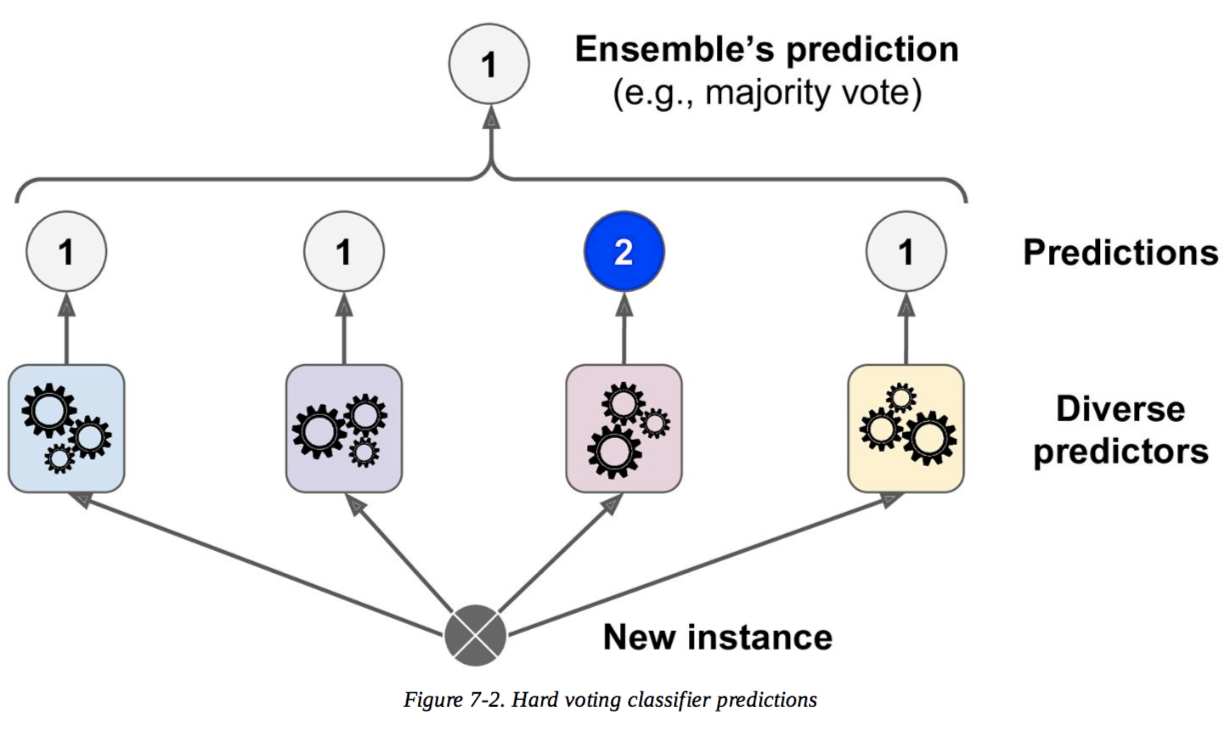
     
  2. Soft Voting - Instead of votes, if all the classifiers are able to estimate class probabilities, we will consider the class with highest probability, averaged over the individual classifiers. This is called soft Voting.
- The soft voting often achieves higher performance than hard voting because it gives more weight to highly confident votes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("marketing_campaign.csv")
data.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
2,432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown
3,432150520,no,2,jun,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,NaN,0,unknown
4,432145870,no,15,may,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,NaN,0,unknown


In [3]:
data.shape

(31480, 20)

In [4]:
data.isnull().sum()

id                                  0
target                              0
day                                 0
month                               0
duration                            0
contactId                           0
age                                 0
gender                              0
job                                 0
maritalStatus                       0
education                           0
creditFailure                       0
accountBalance                      0
house                               0
credit                              0
contactType                         0
numberOfContacts                    0
daySinceLastCampaign            25742
numberOfContactsLastCampaign        0
lastCampaignResult                  0
dtype: int64

In [5]:
data = data.drop(columns = ["id", "daySinceLastCampaign", "contactId"])
data.head()

,target,day,month,duration,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,numberOfContactsLastCampaign,lastCampaignResult
0,no,27,may,166,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,0,unknown
1,no,26,oct,183,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,0,unknown
2,no,5,jun,227,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,0,unknown
3,no,2,jun,31,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,0,unknown
4,no,15,may,1231,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,0,unknown


In [6]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms

MinMaxScaler()

In [7]:
data[["day", "duration", "age", "accountBalance"]] = mms.fit_transform(data[["day", "duration", "age", "accountBalance"]])
data.head()

,target,day,month,duration,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,numberOfContactsLastCampaign,lastCampaignResult
0,no,0.866667,may,0.033754,0.155844,female,worker,married,highSchool,no,0.073443,no,no,unknown,2,0,unknown
1,no,0.833333,oct,0.037210,0.311688,female,manager,married,uniGraduated,no,0.098482,no,no,cellPhone,2,0,unknown
2,no,0.133333,jun,0.046157,0.103896,female,services,single,highSchool,no,0.095616,yes,yes,landline,1,0,unknown
3,no,0.033333,jun,0.006303,0.207792,male,unemployed,divorced,uniGraduated,yes,0.076046,yes,no,unknown,3,0,unknown
4,no,0.466667,may,0.250305,0.389610,male,worker,married,secondarySchool,no,0.080593,yes,no,unknown,2,0,unknown


In [8]:
# Seperate X and y
X = data.drop('target', axis = 1)
y = data['target']

In [9]:
X = pd.get_dummies(X).astype("int")
X.head()

,day,duration,age,accountBalance,numberOfContacts,numberOfContactsLastCampaign,month_apr,month_aug,month_dec,month_feb,...,house_yes,credit_no,credit_yes,contactType_cellPhone,contactType_landline,contactType_unknown,lastCampaignResult_failure,lastCampaignResult_other,lastCampaignResult_success,lastCampaignResult_unknown
0,0,0,0,0,2,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,0,0,0,0,2,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
3,0,0,0,0,3,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1
4,0,0,0,0,2,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1


In [10]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)   

In [11]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc

RandomForestClassifier()

In [13]:
from sklearn.svm import SVC
svc = SVC()
svc

SVC()

In [16]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
                                estimators = [("lr", log_reg), ("rf", rfc), ("svm", svc)],
                                voting = "hard")
voting_clf

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svm', SVC())])

In [17]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svm', SVC())])

In [18]:
from sklearn.metrics import accuracy_score
for clf in (log_reg, rfc, svc, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8908831003811944
RandomForestClassifier 0.8743646759847522
SVC 0.8912007623888183
VotingClassifier 0.8927890724269377


# observations:

- We see that Voting Classifier is giving higher accuracy than the other individual couterparts.
- 89.27% is the accuracy of Voting Classifier highest among all.

# Soft Voting:
- For Soft Voting, consider the predictors which give probability  outputs. Here in this case, both log_reg and rfc can provide probability outputs.
- But SVC, has to be provided with the probability parameter while importing to calculate probability outputs

In [20]:
from sklearn.svm import SVC
svc = SVC(probability = True)
svc

SVC(probability=True)

In [22]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
                                estimators = [("lr", log_reg), ("rf", rfc), ("svm", svc)],
                                voting = "soft")
voting_clf

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [23]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svm', SVC(probability=True))],
                 voting='soft')

In [24]:
from sklearn.metrics import accuracy_score
for clf in (log_reg, rfc, svc, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8908831003811944
RandomForestClassifier 0.8727763659466328
SVC 0.8912007623888183
VotingClassifier 0.8918360864040661


# observations:
- We see that in Voting Classifier, The algorithms are applied on the Same train and test set

# Bagging and Pasting:

- This approach uses same training algorithm for every predictor, but we train them on different random subsets of the training set.
- Considering a subset of the training data we is also called a Sampling of the train set.
- When the sampling is perform with replacement we call it as bagging(bootsrap aggregating)
- When the sampling is perfromed without replacement we call it as pasting.
- Note: In statistics, resampling with replacement is called as bootstrapping.

- Note: Both Bagging and Pasting allow the training set to be sampled several times with multiple predictors.
- But only Bagging allows training set to be sampled several times for the same predictor.

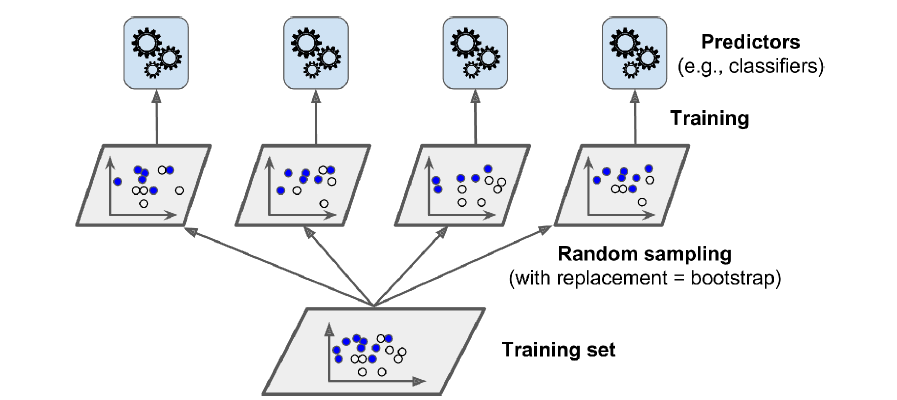

# Boosting:

- Boosting technique involves combining multiple weak learners to create a strong model that can make more accuracte predictions.
- The idea behind boosting is to iteratively trian a series of weak models(models with low accuracy), such as decision trees, on different
subsets of training data.
- Each subsequent model is trained to correct the errors of the previous model, with more emphasis given on the data points that were misclassified.
- By combining the predictions of all the models, the final prediction can be more accuracte and robust than any of the individual models.
- For example, if we want to predict whether a customer will buy a product based on their age, gender, income, we can use boosting to train a series of decision trees on different subsets. Each tree model might focus on different features of the data, such as age or income or gender and produce slightly different predictions. The subsequent models are trained to correct the errors of the previous models and provide more weight to the data that was misclassified. The final prediction is a weighted combination of the predictions from all the tree models, which can improve the accuracy of the  model.
- Boosting is useful for improving the accuracy of the models that tend to have high bias and low variance, such as decision trees, by combining the strength of multiple weak learners

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [28]:
# Create X and y
X = iris.data
y = iris.target

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 1, random_state = 42)
dtc

DecisionTreeClassifier(max_depth=1, random_state=42)

In [36]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [37]:
y_pred = dtc.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7111111111111111

In [40]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
                            base_estimator = dtc,
                            n_estimators = 500,
                            random_state = 42)
ada_clf

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=42),
                   n_estimators=500, random_state=42)

In [41]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=42),
                   n_estimators=500, random_state=42)

In [42]:
y_pred = ada_clf.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred)

1.0

# Notes:
- We are setting the max_depth of the DecisionTree as 1 in order to make it a weak learner. As a result we observe that when DT is applied independently we get an accuracy of 71.11% only.
- But, with boosting, the weak learner is converted to a strong learner and we get an accuracy of 100%
- In practice, you may need to experiement with different values of Hyperparameters such as n_estimators, learning_rate and max_depth to optimize the performance of the model.